In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
from prophet import Prophet
from autots import AutoTS
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [2]:
# Load the dataset
df = pd.read_excel(r'C:\Users\USER\Desktop\HTU\First Semester 4rth Year\Applied Analytical Modelling\gold_futures.xlsx')

# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' column is in datetime format
df = df.sort_values(by='Date')  # Sort data by date
df = df.dropna()  # Remove rows with missing values if any

In [3]:
inferred_frequency = pd.infer_freq(df['Date'])
print(f"Inferred frequency: {inferred_frequency}")
df = df.sort_values('Date')

Inferred frequency: None


In [4]:
time_differences = df['Date'].diff().dropna()
print(time_differences.value_counts())

Date
1 days    974
3 days    222
4 days     37
2 days     11
Name: count, dtype: int64


In [5]:
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit Prophet model
model_prophet = Prophet(seasonality_mode='additive', 
                        changepoint_prior_scale=0.05,
                        interval_width=0.80)
model_prophet.fit(df_prophet)

# Create future dates and predict
future = model_prophet.make_future_dataframe(periods=180)
forecast_prophet = model_prophet.predict(future)

# Display the forecast
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

15:46:15 - cmdstanpy - INFO - Chain [1] start processing
15:46:16 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat   yhat_lower   yhat_upper
1420 2025-06-10  3107.260941  2912.343258  3263.181208
1421 2025-06-11  3105.935089  2908.584566  3275.446539
1422 2025-06-12  3106.878484  2905.600703  3288.247619
1423 2025-06-13  3106.567765  2910.526949  3285.864972
1424 2025-06-14  3090.479179  2883.035113  3252.192125


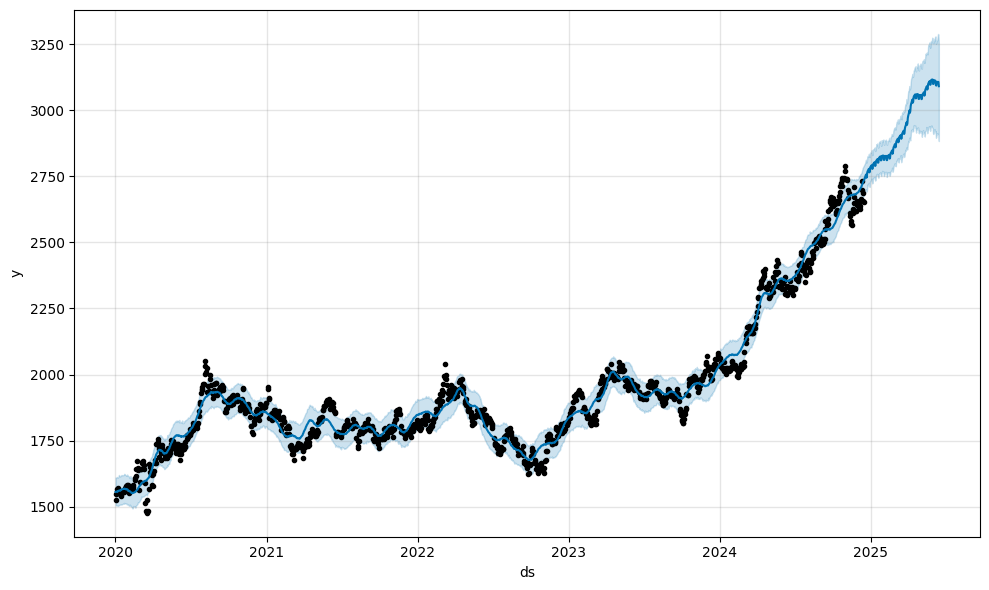

In [6]:
import matplotlib.pyplot as plt

# Plot the forecast
model_prophet.plot(forecast_prophet)
plt.show()

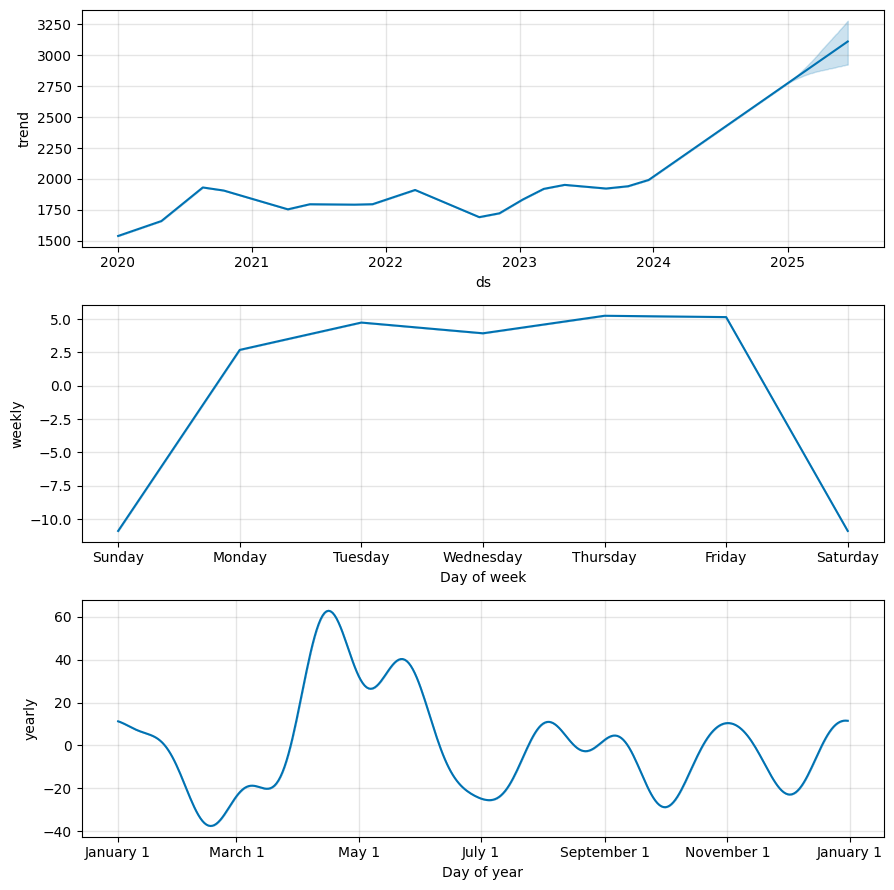

In [7]:
# Plot the forecast components
model_prophet.plot_components(forecast_prophet)
plt.show()

In [8]:
# Extract actual and predicted values
y_true = df_prophet['y']
y_pred = forecast_prophet['yhat'].iloc[:len(y_true)]

# Calculate metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print("R²:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

prophet_metrics = {
    "R²": r2,
    "MAE":mae,
    "MSE": mse,
    "RMSE": rmse
}

R²: 0.9730132804866544
MAE: 33.55811913223206
MSE: 1830.324804130844
RMSE: 42.78229545186705


In [9]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Prepare the DataFrame for AutoTS
autots_data = df[['Date', 'Close']].rename(columns={'Date': 'date', 'Close': 'value'})

# Display the prepared DataFrame
print(autots_data.head())

        date        value
0 2020-01-02  1524.500000
1 2020-01-03  1549.199951
2 2020-01-06  1566.199951
3 2020-01-07  1571.800049
4 2020-01-08  1557.400024


In [15]:
# AutoTS Model Implementation
# Initialize and fit AutoTS model
model_autots = AutoTS(
    forecast_length=180,          # Shorter forecast horizon
    frequency='D',           # Automatically detect frequency
    prediction_interval=0.9,
    ensemble='simple',           # Use a simple ensemble method
    model_list= 'fast',           # Use a predefined list of fast models
    max_generations=10,           # Fewer generations for hyperparameter tuning
    num_validations=2,           # Reduce cross-validation folds
    validation_method='backwards'
)

# Fit the model
model = model_autots.fit(autots_data, date_col='date', value_col='value', id_col=None)

Using 4 cpus for n_jobs.
Data frequency is: B, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 6 with model DatepartRegression in generation 0 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3949
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3970
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3964
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3966
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3952
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3958
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3950
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3947
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3944
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3948
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3947
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3944
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3942
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3941
Epoch 15/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3943
Epoch 16/50
51/51 ━━━━━━━━━━━━

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 29 with model DatepartRegression in generation 0 of 10
Model Number: 30 with model ETS in generation 0 of 10
Model Number: 31 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 31 in generation 0: VECM
Model Number: 32 with model UnivariateMotif in generation 0 of 10
Model Number: 33 with model UnivariateMotif in generation 0 of 10
Model Number: 34 with model SectionalMotif in generation 0 of 10
Model Number: 35 with model SectionalMotif in generation 0 of 10
Model Number: 36 with model SeasonalNaive in generation 0 of 10
Model Number: 37 with model DatepartRegression in generation 0 of 10
Model Number: 38 with model NVAR in generation 0 of 10
Model Number: 39 with model Cassandra in generation 0 of 10
Model Number: 40 with model SeasonalityMotif in generation 0 of 10
Model Number: 41 with model Cassandra in generation 0 of 10
Model Number: 42 with model Cassandra in generation 0 of 10
FillNA method `pad` not k

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 57 with model ETS in generation 0 of 10
Model Number: 58 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 58 in generation 0: VAR
Model Number: 59 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 59 in generation 0: VECM
Model Number: 60 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 60 in generation 0: WindowRegression
Model Number: 61 with model DatepartRegression in generation 0 of 10
interpolating
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 61 in generation 0: DatepartRegression
Model Number: 62 with model UnivariateMotif in generation 0 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 63 with model SectionalMotif in generation 0 of 10
Model Number: 64 with model NVAR in generation 0 of 10
Model Number: 65 with model MAR in generation 0 of 10
Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params ffill {'0': {'low': 4, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 1000}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, '2': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '4': {'lag': 

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.476e+05, tolerance: 2.969e+03
  model = cd_fast.enet_coordinate_descent(


Model Number: 75 with model GLS in generation 0 of 10
Model Number: 76 with model LastValueNaive in generation 0 of 10
Model Number: 77 with model UnivariateMotif in generation 0 of 10
Model Number: 78 with model LastValueNaive in generation 0 of 10
Model Number: 79 with model UnivariateMotif in generation 0 of 10
Model Number: 80 with model UnivariateMotif in generation 0 of 10
Model Number: 81 with model DatepartRegression in generation 0 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.551e+06, tolerance: 2.983e+03
  model = cd_fast.enet_coordinate_descent(


Model Number: 82 with model MetricMotif in generation 0 of 10
Model Number: 83 with model AverageValueNaive in generation 0 of 10
Model Number: 84 with model MetricMotif in generation 0 of 10
Model Number: 85 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 85 in generation 0: DatepartRegression
Model Number: 86 with model GLS in generation 0 of 10
Model Number: 87 with model ETS in generation 0 of 10
Model Number: 88 with model GLM in generation 0 of 10
Model Number: 89 with model GLM in generation 0 of 10
Model Number: 90 with model SectionalMotif in generation 0 of 10
Model Number: 91 with model SectionalMotif in generation 0 of 10
Model Number: 92 with model GLM in generation 0 of 10
Model Number: 93 with model BasicLinearModel in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 93 in generation 0: BasicLinearMod

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 100 with model GLS in generation 0 of 10
Model Number: 101 with model MAR in generation 0 of 10
Template Eval Error: Exception("Transformer Detrend failed on fit from params pchip {'0': {'fillna': 'one', 'center': 'median'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '3': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}} with error ValueError('Input y contains

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 124 with model AverageValueNaive in generation 0 of 10
Model Number: 125 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 125 in generation 0: VECM
Model Number: 126 with model AverageValueNaive in generation 0 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 127 with model SeasonalNaive in generation 0 of 10
Model Number: 128 with model DatepartRegression in generation 0 of 10
Template Eval Error: Exception('Transformer PCA failed on fit from params linear {\'0\': {\'rows\': 2}, \'1\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'mean\'}, \'2\': {\'whiten\': False, \'n_components\': 100}, \'3\': {\'lag_1\': 12, \'method\': 2}} with error ValueError("n_components=100 must be between 0 and min(n_samples, n_features)=1 with svd_solver=\'covariance_eigh\'")') in model 128 in generation 0: DatepartRegression
Model Number: 129 with model FFT in generation 0 of 10
Model Number: 130 with model AverageValueNaive in generation 0 of 10
Model Number: 131 with model LastValueNaive in generation 0 of 10
Model Number: 132 with model ConstantNaive in generation 0 of 10
Model Number: 133 with model MetricMotif in generation 0 of 10
Model Number: 

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 151 with model GLS in generation 0 of 10
Model Number: 152 with model SectionalMotif in generation 0 of 10
Model Number: 153 with model ETS in generation 0 of 10
Model Number: 154 with model ConstantNaive in generation 0 of 10
Model Number: 155 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 155 in generation 0: GLM
Model Number: 156 with model UnivariateMotif in generation 0 of 10
Model Number: 157 with model DatepartRegression in generation 0 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 158 with model SeasonalNaive in generation 0 of 10
Model Number: 159 with model ETS in generation 0 of 10
Model Number: 160 with model NVAR in generation 0 of 10
Model Number: 161 with model DatepartRegression in generation 0 of 10
Template Eval Error: InvalidParameterError("The 'alpha' parameter of MLPRegressor must be a float in the range [0.0, inf). Got None instead.") in model 161 in generation 0: DatepartRegression
Model Number: 162 with model LastValueNaive in generation 0 of 10
Model Number: 163 with model GLS in generation 0 of 10
Model Number: 164 with model Cassandra in generation 0 of 10
Template Eval Error: UnboundLocalError("cannot access local variable 'slope' where it is not associated with a value") in model 164 in generation 0: Cassandra
Model Number: 165 with model BasicLinearModel in generation 0 of 10
New Generation: 1 of 10
Model Number: 166 with model ETS in generation 1 of 10
Model Number: 167 with model DatepartRegression in generation 1 of 10
Temp

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


interpolating
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 185 in generation 1: DatepartRegression
Model Number: 186 with model GLM in generation 1 of 10
Model Number: 187 with model ConstantNaive in generation 1 of 10
Model Number: 188 with model UnivariateMotif in generation 1 of 10
Model Number: 189 with model BasicLinearModel in generation 1 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params median {'0': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'model_name': 'randomly generated_original', 'state_transition': [[1, 0, 0, 0], [0, 0, 0, 0], [0, 1, 1, 1], [0, 0, 0, 1]], 'process_noise': [[0.002, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]], 'observation_model': [[1, 1

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1137: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1143: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\

SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on inverse from params quadratic {'0': {'lag': 7, 'fill': 'zero'}, '1': {'fillna': 'akima', 'center': 'zero'}, '2': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning: overflow encountered in divide
  endog_mu = self._clean(endog / mu)


Model Number: 221 with model WindowRegression in generation 1 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 222 with model UnivariateMotif in generation 1 of 10
Model Number: 223 with model Cassandra in generation 1 of 10
Model Number: 224 with model MetricMotif in generation 1 of 10
Model Number: 225 with model ConstantNaive in generation 1 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'rows': 4}, '2': {'det_order': 1, 'k_ar_diff': 2}, '3': {}} with error ValueError('Coint only works on multivarate series')") in model 225 in generation 1: ConstantNaive
Model Number: 226 with model ConstantNaive in generation 1 of 10
Model Number: 227 with model SectionalMotif in generation 1 of 10
Model Number: 228 with model UnivariateMotif in generation 1 of 10
Model Number: 229 with model AverageValueNaive in generation 1 of 10
Model Number: 230 with model NVAR in generation 1 of 10
Model Number: 2

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.551e+06, tolerance: 2.983e+03
  model = cd_fast.enet_coordinate_descent(


Model Number: 233 with model ConstantNaive in generation 1 of 10
Model Number: 234 with model SeasonalNaive in generation 1 of 10
Model Number: 235 with model FFT in generation 1 of 10
Model Number: 236 with model DatepartRegression in generation 1 of 10
Model Number: 237 with model BasicLinearModel in generation 1 of 10
Model Number: 238 with model LastValueNaive in generation 1 of 10
Model Number: 239 with model DatepartRegression in generation 1 of 10
Model Number: 240 with model SeasonalNaive in generation 1 of 10
Model Number: 241 with model BasicLinearModel in generation 1 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill_mean_biased {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': ['weekdayofmonth', 'common_fourier']}, 'fillna': 'ffill'},

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 253 with model SeasonalityMotif in generation 1 of 10
Model Number: 254 with model ETS in generation 1 of 10
Model Number: 255 with model LastValueNaive in generation 1 of 10
Model Number: 256 with model UnivariateMotif in generation 1 of 10
Model Number: 257 with model ETS in generation 1 of 10
Model Number: 258 with model FFT in generation 1 of 10
Model Number: 259 with model SectionalMotif in generation 1 of 10
Model Number: 260 with model GLS in generation 1 of 10
Model Number: 261 with model DatepartRegression in generation 1 of 10
Model Number: 262 with model UnivariateMotif in generation 1 of 10
Model Number: 263 with model UnivariateMotif in generation 1 of 10
Model Number: 264 with model ETS in generation 1 of 10
Model Number: 265 with model SeasonalNaive in generation 1 of 10
Model Number: 266 with model ETS in generation 1 of 10
Model Number: 267 with model MetricMotif in generation 1 of 10
Model Number: 268 with model ETS in generation 1 of 10
Model Number: 26

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: in

Model Number: 273 with model NVAR in generation 1 of 10
Model Number: 274 with model FFT in generation 1 of 10
Model Number: 275 with model UnivariateMotif in generation 1 of 10
Model Number: 276 with model SectionalMotif in generation 1 of 10
Model Number: 277 with model ETS in generation 1 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.168e+01, tolerance: 1.443e-01
  model = cd_fast.enet_coordinate_descent(


Model Number: 278 with model SectionalMotif in generation 1 of 10
Model Number: 279 with model UnivariateMotif in generation 1 of 10
Model Number: 280 with model AverageValueNaive in generation 1 of 10
New Generation: 2 of 10
Model Number: 281 with model AverageValueNaive in generation 2 of 10
Model Number: 282 with model NVAR in generation 2 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+02, tolerance: 1.631e-01
  model = cd_fast.enet_coordinate_descent(


Model Number: 283 with model SeasonalNaive in generation 2 of 10
Model Number: 284 with model SectionalMotif in generation 2 of 10
Model Number: 285 with model ConstantNaive in generation 2 of 10
Model Number: 286 with model UnivariateMotif in generation 2 of 10
Model Number: 287 with model WindowRegression in generation 2 of 10
interpolating
Template Eval Error: ValueError('Model WindowRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 287 in generation 2: WindowRegression
Model Number: 288 with model SeasonalNaive in generation 2 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 289 with model SeasonalNaive in generation 2 of 10
Model Number: 290 with model UnivariateMotif in generation 2 of 10
Model Number: 291 with model LastValueNaive in generation 2 of 10
Model Number: 292 with model GLS in generation 2 of 10
Model Number: 293 with model SeasonalNaive in generation 2 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 293 in generation 2: SeasonalNaive
Model Number: 294 with model SeasonalNaive in generation 2 of 10
Model Number: 295 with model SectionalMotif in generation 2 of 10
Model Number: 296 with model SeasonalNaive in generation 2 of 10
Model Number: 297 with model GLS in generation 2 of 10
Model Number: 298 with model Cassandra in generation 2 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.54184e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 299 with model Cassandra in generation 2 of 10
Model Number: 300 with model FFT in generation 2 of 10
Model Number: 301 with model SeasonalityMotif in generation 2 of 10
Model Number: 302 with model UnivariateMotif in generation 2 of 10
Model Number: 303 with model SeasonalityMotif in generation 2 of 10
Model Number: 304 with model SectionalMotif in generation 2 of 10
Model Number: 305 with model SeasonalityMotif in generation 2 of 10
Model Number: 306 with model MetricMotif in generation 2 of 10
Model Number: 307 with model SeasonalityMotif in generation 2 of 10
Model Number: 308 with model NVAR in generation 2 of 10
Model Number: 309 with model Cassandra in generation 2 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Template Eval Error: KeyError("['changepoint_1', 'changepoint_2', 'changepoint_3', 'changepoint_4', 'changepoint_5', 'changepoint_6', 'changepoint_7', 'changepoint_8', 'changepoint_9', 'changepoint_10', 'changepoint_11', 'changepoint_12', 'changepoint_15', 'changepoint_16', 'changepoint_17', 'changepoint_18', 'changepoint_19', 'changepoint_20', 'changepoint_21', 'changepoint_22', 'changepoint_23', 'changepoint_24', 'changepoint_25', 'changepoint_26', 'changepoint_27'] not in index") in model 309 in generation 2: Cassandra
Model Number: 310 with model DatepartRegression in generation 2 of 10
Model Number: 311 with model GLM in generation 2 of 10
Model Number: 312 with model SeasonalityMotif in generation 2 of 10
Model Number: 313 with model SeasonalityMotif in generation 2 of 10
Model Number: 314 with model LastValueNaive in generation 2 of 10
Model Number: 315 with model GLS in generation 2 of 10
Model Number: 316 with model Cassandra in generation 2 of 10
Model Number: 317 with model 

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.867e+06, tolerance: 3.325e+03
  model = cd_fast.enet_coordinate_descent(


Model Number: 330 with model SeasonalNaive in generation 2 of 10
Model Number: 331 with model UnivariateMotif in generation 2 of 10
Model Number: 332 with model SectionalMotif in generation 2 of 10
Model Number: 333 with model AverageValueNaive in generation 2 of 10
Model Number: 334 with model LastValueNaive in generation 2 of 10
Model Number: 335 with model SeasonalNaive in generation 2 of 10
Model Number: 336 with model ETS in generation 2 of 10
Model Number: 337 with model BallTreeMultivariateMotif in generation 2 of 10
Model Number: 338 with model FFT in generation 2 of 10
Model Number: 339 with model UnivariateMotif in generation 2 of 10
Model Number: 340 with model SeasonalityMotif in generation 2 of 10
Model Number: 341 with model SectionalMotif in generation 2 of 10
Model Number: 342 with model UnivariateMotif in generation 2 of 10
Model Number: 343 with model ConstantNaive in generation 2 of 10
Model Number: 344 with model ConstantNaive in generation 2 of 10
Model Number: 345

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 371 with model ETS in generation 2 of 10
Model Number: 372 with model SectionalMotif in generation 2 of 10
Model Number: 373 with model DatepartRegression in generation 2 of 10
Model Number: 374 with model BasicLinearModel in generation 2 of 10
Model Number: 375 with model AverageValueNaive in generation 2 of 10
Model Number: 376 with model DatepartRegression in generation 2 of 10
interpolating
Model Number: 377 with model SeasonalityMotif in generation 2 of 10
Model Number: 378 with model SeasonalityMotif in generation 2 of 10
Model Number: 379 with model UnivariateMotif in generation 2 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 380 with model GLM in generation 2 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Per

Model Number: 381 with model LastValueNaive in generation 2 of 10
Model Number: 382 with model ETS in generation 2 of 10
Model Number: 383 with model Cassandra in generation 2 of 10
FillNA method `pad` not known, returning original
Template Eval Error: KeyError("['changepoint_1', 'changepoint_2', 'changepoint_3', 'changepoint_4', 'changepoint_5', 'changepoint_6', 'changepoint_7', 'changepoint_8', 'changepoint_9', 'changepoint_10'] not in index") in model 383 in generation 2: Cassandra
Model Number: 384 with model ETS in generation 2 of 10
Model Number: 385 with model SeasonalityMotif in generation 2 of 10
Model Number: 386 with model GLM in generation 2 of 10
Model Number: 387 with model ETS in generation 2 of 10
Model Number: 388 with model DatepartRegression in generation 2 of 10
Model Number: 389 with model ConstantNaive in generation 2 of 10
Model Number: 390 with model SeasonalityMotif in generation 2 of 10
Model Number: 391 with model LastValueNaive in generation 2 of 10
Model Nu

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

Model Number: 408 with model BasicLinearModel in generation 3 of 10
Model Number: 409 with model Cassandra in generation 3 of 10
FillNA method `pad` not known, returning original


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Program

Model Number: 410 with model DatepartRegression in generation 3 of 10
Model Number: 411 with model SectionalMotif in generation 3 of 10
Model Number: 412 with model GLM in generation 3 of 10
Model Number: 413 with model SeasonalityMotif in generation 3 of 10
Model Number: 414 with model BasicLinearModel in generation 3 of 10
Model Number: 415 with model Cassandra in generation 3 of 10
FillNA method `pad` not known, returning original
Model Number: 416 with model GLS in generation 3 of 10
Model Number: 417 with model AverageValueNaive in generation 3 of 10
Model Number: 418 with model Cassandra in generation 3 of 10
FillNA method `pad` not known, returning original
Model Number: 419 with model GLM in generation 3 of 10
Model Number: 420 with model UnivariateMotif in generation 3 of 10
Model Number: 421 with model ETS in generation 3 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 422 with model ETS in generation 3 of 10
Model Number: 423 with model MetricMotif in generation 3 of 10
Model Number: 424 with model GLM in generation 3 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 425 with model ETS in generation 3 of 10
Model Number: 426 with model FFT in generation 3 of 10
Model Number: 427 with model SeasonalNaive in generation 3 of 10
Model Number: 428 with model SectionalMotif in generation 3 of 10
Model Number: 429 with model ConstantNaive in generation 3 of 10
Model Number: 430 with model UnivariateMotif in generation 3 of 10
Model Number: 431 with model UnivariateMotif in generation 3 of 10
Model Number: 432 with model LastValueNaive in generation 3 of 10
Model Number: 433 with model ETS in generation 3 of 10
Model Number: 434 with model NVAR in generation 3 of 10
Model Number: 435 with model NVAR in generation 3 of 10
Model Number: 436 with model SeasonalityMotif in generation 3 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 437 with model DatepartRegression in generation 3 of 10
Model Number: 438 with model SectionalMotif in generation 3 of 10
Model Number: 439 with model AverageValueNaive in generation 3 of 10
Template Eval Error: Exception("Transformer ChangepointDetrend failed on fit from params linear {'0': {'lag_1': 12, 'method': 'Median'}, '1': {}, '2': {'constant': 0, 'reintroduction_model': None, 'fillna': None}, '3': {}, '4': {'model': 'ElasticNet', 'changepoint_spacing': 6, 'changepoint_distance_end': 360, 'datepart_method': None}, '5': {'rows': 2}} with error ValueError('Input y contains NaN.')") in model 439 in generation 3: AverageValueNaive
Model Number: 440 with model AverageValueNaive in generation 3 of 10
Model Number: 441 with model WindowRegression in generation 3 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 442 with model GLM in generation 3 of 10
Model Number: 443 with model Cassandra in generation 3 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 444 with model DatepartRegression in generation 3 of 10
Model Number: 445 with model BasicLinearModel in generation 3 of 10
Model Number: 446 with model SeasonalityMotif in generation 3 of 10
Model Number: 447 with model DatepartRegression in generation 3 of 10
Model Number: 448 with model UnivariateMotif in generation 3 of 10
Model Number: 449 with model Cassandra in generation 3 of 10
Model Number: 450 with model AverageValueNaive in generation 3 of 10
Model Number: 451 with model ETS in generation 3 of 10
Model Number: 452 with model GLS in generation 3 of 10
Model Number: 453 with model SeasonalityMotif in generation 3 of 10
Model Number: 454 with model SeasonalityMotif in generation 3 of 10
Model Number: 455 with model UnivariateMotif in generation 3 of 10
Model Number: 456 with model BasicLinearModel in generation 3 of 10
Model Number: 457 with model ETS in generation 3 of 10
Model Number: 458 with model Cassandra in generation 3 of 10
Model Number: 459 with model N

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid

Model Number: 464 with model SectionalMotif in generation 3 of 10
Model Number: 465 with model FFT in generation 3 of 10
Model Number: 466 with model FFT in generation 3 of 10
Model Number: 467 with model AverageValueNaive in generation 3 of 10
Model Number: 468 with model DatepartRegression in generation 3 of 10
Template Eval Error: IndexError('tuple index out of range') in model 468 in generation 3: DatepartRegression
Model Number: 469 with model SectionalMotif in generation 3 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params cubic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {}, '2': {}, '3': {'det_order': -1, 'k_ar_diff': 1}} with error ValueError('Coint only works on multivarate series')") in model 469 in generation 3: SectionalMotif
Model Number: 470 with model SeasonalNaive in generation 3 of 10
Model Number: 471 with model AverageValueNaive

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 475 with model SeasonalityMotif in generation 3 of 10
Model Number: 476 with model AverageValueNaive in generation 3 of 10
Model Number: 477 with model SeasonalNaive in generation 3 of 10
Model Number: 478 with model LastValueNaive in generation 3 of 10
Model Number: 479 with model Cassandra in generation 3 of 10
FillNA method `pad` not known, returning original
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 479 in generation 3: Cassandra
Model Number: 480 with model GLS in generation 3 of 10
Model Number: 481 with model LastValueNaive in generation 3 of 10
Model Number: 482 with model SeasonalityMotif in generation 3 of 10
Model Number: 483 with model SectionalMotif in generation 3 of 10
Template Eval Error: Exception("Transformer Detrend failed on fit from params rolling_mean {'0': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_p

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:898: RuntimeWarning: divide by zero encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: 

Model Number: 502 with model BasicLinearModel in generation 3 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 503 with model SeasonalNaive in generation 3 of 10
Model Number: 504 with model ConstantNaive in generation 3 of 10
Model Number: 505 with model SectionalMotif in generation 3 of 10
Model Number: 506 with model UnivariateMotif in generation 3 of 10
Model Number: 507 with model ETS in generation 3 of 10
Model Number: 508 with model UnivariateMotif in generation 3 of 10
Model Number: 509 with model Cassandra in generation 3 of 10
Model Number: 510 with model UnivariateMotif in generation 3 of 10
New Generation: 4 of 10
Model Number: 511 with model WindowRegression in generation 4 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 512 with model BallTreeMultivariateMotif in generation 4 of 10
Model Number: 513 with model SectionalMotif in generation 4 of 10
Model Number: 514 with model UnivariateMotif in generation 4 of 10
Model Number: 515 with model SectionalMotif in generation 4 of 10
Model Number: 516 with model Cassandra in generation 4 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 517 with model SeasonalNaive in generation 4 of 10
Model Number: 518 with model Cassandra in generation 4 of 10
Model Number: 519 with model BasicLinearModel in generation 4 of 10
Model Number: 520 with model LastValueNaive in generation 4 of 10
Model Number: 521 with model BallTreeMultivariateMotif in generation 4 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 522 with model ETS in generation 4 of 10
Model Number: 523 with model SeasonalityMotif in generation 4 of 10
Model Number: 524 with model ETS in generation 4 of 10
Model Number: 525 with model FFT in generation 4 of 10
Model Number: 526 with model AverageValueNaive in generation 4 of 10
Model Number: 527 with model SeasonalityMotif in generation 4 of 10
Model Number: 528 with model DatepartRegression in generation 4 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.867e+06, tolerance: 3.325e+03
  model = cd_fast.enet_coordinate_descent(


Model Number: 529 with model SeasonalityMotif in generation 4 of 10
Model Number: 530 with model UnivariateMotif in generation 4 of 10
Model Number: 531 with model GLS in generation 4 of 10
Model Number: 532 with model UnivariateMotif in generation 4 of 10
Model Number: 533 with model GLS in generation 4 of 10
Model Number: 534 with model FFT in generation 4 of 10
Model Number: 535 with model AverageValueNaive in generation 4 of 10
Model Number: 536 with model NVAR in generation 4 of 10
Model Number: 537 with model UnivariateMotif in generation 4 of 10
Model Number: 538 with model MetricMotif in generation 4 of 10
Model Number: 539 with model Cassandra in generation 4 of 10
Model Number: 540 with model DatepartRegression in generation 4 of 10
Model Number: 541 with model DatepartRegression in generation 4 of 10
Model Number: 542 with model WindowRegression in generation 4 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 543 with model ETS in generation 4 of 10
Model Number: 544 with model SeasonalNaive in generation 4 of 10
Model Number: 545 with model GLS in generation 4 of 10
Model Number: 546 with model Cassandra in generation 4 of 10
Model Number: 547 with model MetricMotif in generation 4 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 547 in generation 4: MetricMotif
Model Number: 548 with model BasicLinearModel in generation 4 of 10
Model Number: 549 with model SectionalMotif in generation 4 of 10
Model Number: 550 with model Cassandra in generation 4 of 10
Model Number: 551 with model FFT in generation 4 of 10
Model Number: 552 with model Cassandra in generation 4 of 10
Model Number: 553 with model GLS in generation 4 of 10
Model Number: 554 with model DatepartRegression in generation 4 of 10
Model Number: 555 with model MetricMotif in generation 4 of 10
Model Number: 556 with model SectionalMotif in generation 4 of 10
Model 

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 564 with model Cassandra in generation 4 of 10
Template Eval Error: UnboundLocalError("cannot access local variable 'slope' where it is not associated with a value") in model 564 in generation 4: Cassandra
Model Number: 565 with model SeasonalityMotif in generation 4 of 10
Model Number: 566 with model BasicLinearModel in generation 4 of 10
Model Number: 567 with model ETS in generation 4 of 10
Model Number: 568 with model GLM in generation 4 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 568 in generation 4: GLM
Model Number: 569 with model Cassandra in generation 4 of 10
Model Number: 570 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'quadratic', 'transformations': {'0': 'Round', '1': 'AlignLastValue', '2': 'AlignLastValue', '3': 'PowerTransformer'}, 'transformation_params': {'0': {'decimals': -2, 'on_transform': Fal

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 573 with model DatepartRegression in generation 4 of 10
Model Number: 574 with model AverageValueNaive in generation 4 of 10
Model Number: 575 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 575 in generation 4: GLM
Model Number: 576 with model SeasonalityMotif in generation 4 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'model': 'Linear', 'phi': 0.998, 'window': None, 'transform_dict': {'fillna': 'fake_date', 'transformations': {'0': 'PositiveShift'}, 'transformation_params': {'0': {}}}}, '1': {'model': 'Linear', 'changepoint_spacing': 180, 'changepoint_distance_end': 180, 'datepart_method': None}, '2': {}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 576 i

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 578 with model RRVAR in generation 4 of 10
Model Number: 579 with model BallTreeMultivariateMotif in generation 4 of 10
Model Number: 580 with model BallTreeMultivariateMotif in generation 4 of 10
Model Number: 581 with model UnivariateMotif in generation 4 of 10
Model Number: 582 with model SeasonalNaive in generation 4 of 10
Model Number: 583 with model BasicLinearModel in generation 4 of 10
Model Number: 584 with model ConstantNaive in generation 4 of 10
Model Number: 585 with model AverageValueNaive in generation 4 of 10
Model Number: 586 with model BasicLinearModel in generation 4 of 10
Model Number: 587 with model SeasonalNaive in generation 4 of 10
Model Number: 588 with model Cassandra in generation 4 of 10
Model Number: 589 with model GLM in generation 4 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'MinMaxScaler', '1': 'Log', '2': 'PowerTransformer'}, 'transformation_params': {'0': {}, '1': {}, '2': {}}}. fail_on_forecast_nan=True") in model 589 in generation 4: GLM
Model Number: 590 with model UnivariateMotif in generation 4 of 10
Model Number: 591 with model SeasonalityMotif in generation 4 of 10
Model Number: 592 with model ConstantNaive in generation 4 of 10
Model Number: 593 with model SeasonalNaive in generation 4 of 10
Model Number: 594 with model NVAR in generation 4 of 10
Model Number: 595 with model SeasonalityMotif in generation 4 of 10
Model Number: 596 with model FFT in generation 4 of 10
Model Number: 597 with model LastValueNaive in generation 4 of 10
Model Number: 598 with model LastValueNaive in generation 4 of 10
Model Number: 599 with model ETS in generation 4 of 10
Model Number: 600 with model NVAR in generation 4 of 10
Templa

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 617 with model SeasonalNaive in generation 4 of 10
Model Number: 618 with model AverageValueNaive in generation 4 of 10
Model Number: 619 with model ETS in generation 4 of 10
Model Number: 620 with model ETS in generation 4 of 10
Model Number: 621 with model NVAR in generation 4 of 10
Model Number: 622 with model SeasonalityMotif in generation 4 of 10
Model Number: 623 with model LastValueNaive in generation 4 of 10
Model Number: 624 with model GLS in generation 4 of 10
Model Number: 625 with model UnivariateMotif in generation 4 of 10
New Generation: 5 of 10
Model Number: 626 with model LastValueNaive in generation 5 of 10
Model Number: 627 with model SectionalMotif in generation 5 of 10
Model Number: 628 with model AverageValueNaive in generation 5 of 10
Model Number: 629 with model Cassandra in generation 5 of 10
Model Number: 630 with model SectionalMotif in generation 5 of 10
Model Number: 631 with model GLM in generation 5 of 10
Model Number: 632 with model AverageV

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57.0643    
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0290
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9535 
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9007 
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8667 
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8892 
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8218 
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7910 
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7828 
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8452 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Model Number: 634 with model Cassandra in generation 5 of 10
Model Number: 635 with model AverageValueNaive in generation 5 of 10
Model Number: 636 with model LastValueNaive in generation 5 of 10
Model Number: 637 with model BasicLinearModel in generation 5 of 10
Model Number: 638 with model FFT i

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 678 with model SeasonalityMotif in generation 5 of 10
Model Number: 679 with model SeasonalityMotif in generation 5 of 10
Model Number: 680 with model UnivariateMotif in generation 5 of 10
Model Number: 681 with model ETS in generation 5 of 10
Model Number: 682 with model SectionalMotif in generation 5 of 10
Model Number: 683 with model ETS in generation 5 of 10
Model Number: 684 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 684 in generation 5: WindowRegression
Model Number: 685 with model LastValueNaive in generation 5 of 10
Model Number: 686 with model BasicLinearModel in generation 5 of 10
Model Number: 687 with model BasicLinearModel in generation 5 of 10
Model Number: 688 with model WindowRegression in generation 5 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without fe

Model Number: 689 with model SeasonalNaive in generation 5 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 690 with model UnivariateMotif in generation 5 of 10
Model Number: 691 with model BasicLinearModel in generation 5 of 10
Model Number: 692 with model BasicLinearModel in generation 5 of 10
Model Number: 693 with model Cassandra in generation 5 of 10
Model Number: 694 with model Cassandra in generation 5 of 10
Model Number: 695 with model ETS in generation 5 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 696 with model BasicLinearModel in generation 5 of 10
Model Number: 697 with model Cassandra in generation 5 of 10
Model Number: 698 with model BallTreeMultivariateMotif in generation 5 of 10
Model Number: 699 with model ETS in generation 5 of 10
Model Number: 700 with model ConstantNaive in generation 5 of 10
Model Number: 701 with model LastValueNaive in generation 5 of 10
Model Number: 702 with model NVAR in generation 5 of 10
Model Number: 703 with model ETS in generation 5 of 10
Model Number: 704 with model RRVAR in generation 5 of 10
Model Number: 705 with model SeasonalNaive in generation 5 of 10
Model Number: 706 with model BallTreeMultivariateMotif in generation 5 of 10
Model Number: 707 with model FFT in generation 5 of 10
Model Number: 708 with model SeasonalityMotif in generation 5 of 10
Model Number: 709 with model SeasonalityMotif in generation 5 of 10
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_foreca

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 712 with model UnivariateMotif in generation 5 of 10
Model Number: 713 with model ETS in generation 5 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Model Number: 714 with model NVAR in generation 5 of 10
Model Number: 715 with model GLM in generation 5 of 10
Model Number: 716 with model AverageValueNaive in generation 5 of 10
Model Number: 717 with model SeasonalNaive in generation 5 of 10
New Generation: 6 of 10
Model Number: 718 with model SectionalMotif in generation 6 of 10
Template Eval Error: Exception("Transformer Detrend failed on fit from params median {'0': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 250, 'whiten': 'unit-variance'}, '1': {'model': 'Linear', 'changepoint_spacing': 180, 'changepoint_distance_end': 180, 'datepart_method': None}, '2': {'rows': 2}, '3': {'model': 'Tweedie', 'phi': 1, 'window': 365, 'transform_dict': None}, '4': {'lag_1': 7, 'method': 'LastValue'}} with error ValueError('Found input variables with inconsistent numbers of samples: [365, 1631]')") in model 718 in generation 6: SectionalMotif
Model Number: 719 with model SeasonalNaive in generation 6 of 10
Model Number: 720 with model Ca

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 727 with model ConstantNaive in generation 6 of 10
Model Number: 728 with model Cassandra in generation 6 of 10
Model Number: 729 with model UnivariateMotif in generation 6 of 10
Model Number: 730 with model SeasonalityMotif in generation 6 of 10
Model Number: 731 with model LastValueNaive in generation 6 of 10
Model Number: 732 with model ETS in generation 6 of 10
Model Number: 733 with model SeasonalNaive in generation 6 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.54184e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 734 with model SectionalMotif in generation 6 of 10
Model Number: 735 with model ETS in generation 6 of 10
Model Number: 736 with model SeasonalityMotif in generation 6 of 10
Model Number: 737 with model BallTreeMultivariateMotif in generation 6 of 10
Model Number: 738 with model SeasonalNaive in generation 6 of 10
Model Number: 739 with model ConstantNaive in generation 6 of 10
Model Number: 740 with model SeasonalityMotif in generation 6 of 10
Model Number: 741 with model SeasonalNaive in generation 6 of 10
Model Number: 742 with model SectionalMotif in generation 6 of 10
Model Number: 743 with model ETS in generation 6 of 10
Model Number: 744 with model SeasonalNaive in generation 6 of 10
Model Number: 745 with model UnivariateMotif in generation 6 of 10
Model Number: 746 with model FFT in generation 6 of 10
Model Number: 747 with model DatepartRegression in generation 6 of 10
Model Number: 748 with model SectionalMotif in generation 6 of 10
Model Number: 749 with mode

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.54184e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 758 with model UnivariateMotif in generation 6 of 10
Model Number: 759 with model LastValueNaive in generation 6 of 10
Model Number: 760 with model Cassandra in generation 6 of 10
Model Number: 761 with model SeasonalNaive in generation 6 of 10
Model Number: 762 with model GLM in generation 6 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in add
  endog * np.log(endog 

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 762 in generation 6: GLM
Model Number: 763 with model Cassandra in generation 6 of 10
Model Number: 764 with model ETS in generation 6 of 10
Model Number: 765 with model LastValueNaive in generation 6 of 10
Model Number: 766 with model WindowRegression in generation 6 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 767 with model UnivariateMotif in generation 6 of 10
Model Number: 768 with model LastValueNaive in generation 6 of 10
Model Number: 769 with model Cassandra in generation 6 of 10
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 769 in generation 6: Cassandra
Model Number: 770 with model BasicLinearModel in generation 6 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 771 with model GLS in generation 6 of 10
Model Number: 772 with model BasicLinearModel in generation 6 of 10
Model Number: 773 with model GLS in generation 6 of 10
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'constraint_method': 'historic_diff', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': 1.0, 'bounds_only': False, 'fillna': None}, '2': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'minmax', 'method_params': {'alpha': 0.03}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, 'remove_excess

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in add
  endog * np.log(endog 

Model Number: 799 with model BasicLinearModel in generation 6 of 10
Model Number: 800 with model LastValueNaive in generation 6 of 10
Model Number: 801 with model BallTreeMultivariateMotif in generation 6 of 10
Model Number: 802 with model NVAR in generation 6 of 10
Model Number: 803 with model NVAR in generation 6 of 10
Model Number: 804 with model SeasonalNaive in generation 6 of 10
Model Number: 805 with model UnivariateMotif in generation 6 of 10
Model Number: 806 with model SectionalMotif in generation 6 of 10
Model Number: 807 with model AverageValueNaive in generation 6 of 10
Model Number: 808 with model SectionalMotif in generation 6 of 10
Model Number: 809 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 809 in generation 6: WindowRegression
New Generation: 7 of 10
Model Number: 810 with model Cassandra in generation 7 of 10
Template Eval Error: Exception("Transformer Detrend fai

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Model Number: 826 with model AverageValueNaive in generation 7 of 10
Model Number: 827 with model UnivariateMotif in generation 7 of 10
Model Number: 828 with model SectionalMotif in generation 7 of 10
Model Number: 829 with model WindowRegression in generation 7 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\seasonal.py:896: RuntimeWarning: invalid value encountered in divide
  scores = np.mean(np.abs(a - b) / divisor, axis=2)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\seasonal.py:896: RuntimeWarning: invalid value encountered in divide
  scores = np.mean(np.abs(a - b) / divisor, axis=2)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\seasonal.py:896: RuntimeWarning: invalid value encountered in divide
  scores = np.mean(np.abs(a - b) / divisor, axis=2)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warni

Model Number: 830 with model LastValueNaive in generation 7 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 831 with model SeasonalNaive in generation 7 of 10
Model Number: 832 with model AverageValueNaive in generation 7 of 10
Model Number: 833 with model SeasonalNaive in generation 7 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.747e+03, tolerance: 2.342e+01
  model = cd_fast.enet_coordinate_descent(


Model Number: 834 with model RRVAR in generation 7 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\linalg\_linalg.py:2217: RuntimeWarning: overflow encountered in divide
  s = divide(1, s, where=large, out=s)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\matrix_var.py:30: RuntimeWarning: invalid value encountered in matmul
  W = X2 @ np.linalg.pinv((V @ X1))


Template Eval Error: LinAlgError('SVD did not converge') in model 834 in generation 7: RRVAR
Model Number: 835 with model SectionalMotif in generation 7 of 10
Model Number: 836 with model RRVAR in generation 7 of 10
Model Number: 837 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 837 in generation 7: DatepartRegression
Model Number: 838 with model SeasonalityMotif in generation 7 of 10
Model Number: 839 with model ConstantNaive in generation 7 of 10
Model Number: 840 with model AverageValueNaive in generation 7 of 10
Model Number: 841 with model GLS in generation 7 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


Model Number: 842 with model BasicLinearModel in generation 7 of 10
Model Number: 843 with model SeasonalityMotif in generation 7 of 10
Model Number: 844 with model MetricMotif in generation 7 of 10
Model Number: 845 with model SectionalMotif in generation 7 of 10
Model Number: 846 with model FFT in generation 7 of 10
Model Number: 847 with model GLM in generation 7 of 10
Model Number: 848 with model SeasonalityMotif in generation 7 of 10
Model Number: 849 with model SeasonalityMotif in generation 7 of 10
Model Number: 850 with model SeasonalNaive in generation 7 of 10
Model Number: 851 with model RRVAR in generation 7 of 10
Model Number: 852 with model GLM in generation 7 of 10
Model Number: 853 with model DatepartRegression in generation 7 of 10
Model Number: 854 with model BasicLinearModel in generation 7 of 10
Model Number: 855 with model GLM in generation 7 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 856 with model ETS in generation 7 of 10
Model Number: 857 with model ETS in generation 7 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params cubic {'0': {'det_order': 1, 'k_ar_diff': 1}, '1': {'low': 12, 'high': 32, 'K': 12, 'lanczos_factor': False, 'return_diff': True, 'on_transform': True, 'on_inverse': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}} with error ValueError('Coint only works on multivarate series')") in model 857 in generation 7: ETS
Model Number: 858 with model BasicLinearModel in generation 7 of 10
Model Number: 859 with model LastValueNaive in generation 7 of 10
Model Number: 860 with model UnivariateMotif in generation 7 of 10
Model Number: 861 with model DatepartRegression in ge

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 863 with model GLS in generation 7 of 10
Model Number: 864 with model WindowRegression in generation 7 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 865 with model BasicLinearModel in generation 7 of 10
Model Number: 866 with model NVAR in generation 7 of 10
Model Number: 867 with model SeasonalNaive in generation 7 of 10
Model Number: 868 with model RRVAR in generation 7 of 10
Model Number: 869 with model DatepartRegression in generation 7 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'lag': 1, 'fill': 'bfill'}, '1': {}, '2': {'det_order': 1, 'k_ar_diff': 1}, '3': {'det_order': -1, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 869 in generation 7: DatepartRegression
Model Number: 870 with model ConstantNaive in generation 7 of 10
Model Number: 871 with model Cassandra in generation 7 of 10
Model Number: 872 with model FFT in generation 7 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Model Number: 873 with model MetricMotif in generation 7 of 10
Model Number: 874 with model Cassandra in generation 7 of 10
Model Number: 875 with model SeasonalNaive in generation 7 of 10
Model Number: 876 with model SeasonalNaive in generation 7 of 10
Model Number: 877 with model SeasonalityMotif in generation 7 of 10
Model Number: 878 with model BasicLinearModel in generation 7 of 10
Model Number: 879 with model GLS in generation 7 of 10
Model Number: 880 with model SeasonalityMotif in generation 7 of 10
Model Number: 881 with model AverageValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params pchip {\'0\': {}, \'1\': {\'fillna\': \'akima\', \'center\': \'zero\'}, \'2\': {}, \'3\': {\'model\': \'Poisson\', \'changepoint_spacing\': 180, \'changepoint_distance_end\': 520, \'datepart_method\': \'simple_binarized\'}} with error ValueError("Some value(s) of y are out of the valid range of the loss \'HalfPoissonLoss\'.")')

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.54184e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 896 with model GLS in generation 7 of 10
Model Number: 897 with model Cassandra in generation 7 of 10
Model Number: 898 with model SeasonalNaive in generation 7 of 10
Model Number: 899 with model ConstantNaive in generation 7 of 10
Model Number: 900 with model WindowRegression in generation 7 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 901 with model BallTreeMultivariateMotif in generation 7 of 10
New Generation: 8 of 10
Model Number: 902 with model BallTreeMultivariateMotif in generation 8 of 10
Model Number: 903 with model ETS in generation 8 of 10
Model Number: 904 with model ETS in generation 8 of 10
Model Number: 905 with model SeasonalNaive in generation 8 of 10
Model Number: 906 with model WindowRegression in generation 8 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {'lag_1': 96, 'method': 'LastValue'}, '3': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 0.7, 'first_value_only': True, 'threshold': 3, 'threshold_method': 'mean'}} with error ValueError('BTCD only works on multivarate series')") in model 906 in generation 8: WindowRegression
Model Number: 907 with model ETS in generation 8 of 10
Model Number: 908 with model GLS in g

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 919 with model NVAR in generation 8 of 10
Model Number: 920 with model SectionalMotif in generation 8 of 10
Model Number: 921 with model LastValueNaive in generation 8 of 10
Model Number: 922 with model BasicLinearModel in generation 8 of 10
Model Number: 923 with model SeasonalityMotif in generation 8 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 924 with model SeasonalityMotif in generation 8 of 10
Model Number: 925 with model FFT in generation 8 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'Slice', '1': 'PowerTransformer'}, 'transformation_params': {'0': {'method': 0.2}, '1': {}}}. fail_on_forecast_nan=True") in model 925 in generation 8: FFT
Model Number: 926 with model AverageValueNaive in generation 8 of 10
Model Number: 927 with model Cassandra in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 927 in generation 8: Cassandra
Model Number: 928 with model Cassandra in generation 8 of 10
Model Number: 929 with model SeasonalityMotif in generation 8 of 10
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill_mean_biased {'0': {'rows': 84, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'th

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 936 with model BallTreeMultivariateMotif in generation 8 of 10
Model Number: 937 with model WindowRegression in generation 8 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 938 with model NVAR in generation 8 of 10
Model Number: 939 with model SeasonalNaive in generation 8 of 10
Model Number: 940 with model UnivariateMotif in generation 8 of 10
Model Number: 941 with model SeasonalityMotif in generation 8 of 10
Model Number: 942 with model ConstantNaive in generation 8 of 10
Model Number: 943 with model ConstantNaive in generation 8 of 10
Model Number: 944 with model BallTreeMultivariateMotif in generation 8 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {}, '1': {'model': 'Linear', 'changepoint_spacing': 180, 'changepoint_distance_end': 180, 'datepart_method': None}, '2': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 946 with model ETS in generation 8 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 947 with model NVAR in generation 8 of 10
Model Number: 948 with model SeasonalityMotif in generation 8 of 10
Model Number: 949 with model BasicLinearModel in generation 8 of 10
Model Number: 950 with model RRVAR in generation 8 of 10
Model Number: 951 with model UnivariateMotif in generation 8 of 10
Model Number: 952 with model SectionalMotif in generation 8 of 10
Model Number: 953 with model SeasonalNaive in generation 8 of 10
Model Number: 954 with model SectionalMotif in generation 8 of 10
Model Number: 955 with model LastValueNaive in generation 8 of 10
Model Number: 956 with model FFT in generation 8 of 10
Model Number: 957 with model BasicLinearModel in generation 8 of 10
Model Number: 958 with model SeasonalNaive in generation 8 of 10
Model Number: 959 with model BasicLinearModel in generation 8 of 10
Model Number: 960 with model SeasonalityMotif in generation 8 of 10
Model Number: 961 with model ETS in generation 8 of 10
Model Number: 962 with model SectionalMoti

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 968 with model Cassandra in generation 8 of 10
Model Number: 969 with model BasicLinearModel in generation 8 of 10
Model Number: 970 with model LastValueNaive in generation 8 of 10
Model Number: 971 with model DatepartRegression in generation 8 of 10
Model Number: 972 with model Cassandra in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 972 in generation 8: Cassandra
Model Number: 973 with model RRVAR in generation 8 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\linalg\_linalg.py:2217: RuntimeWarning: overflow encountered in divide
  s = divide(1, s, where=large, out=s)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\linalg\_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


Template Eval Error: LinAlgError('SVD did not converge') in model 973 in generation 8: RRVAR
Model Number: 974 with model DatepartRegression in generation 8 of 10
Model Number: 975 with model ETS in generation 8 of 10
Model Number: 976 with model DatepartRegression in generation 8 of 10
Model Number: 977 with model SeasonalityMotif in generation 8 of 10
Model Number: 978 with model BasicLinearModel in generation 8 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 978 in generation 8: BasicLinearModel
Model Number: 979 with model BasicLinearModel in generation 8 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 979 in generation 8: BasicLinearModel
Model Number: 980 with model FFT in generation 8 of 10
Model Number: 981 with model SeasonalityMotif in generation 8 of 10
Model Number: 982 with model SeasonalNaive in generation 8 of 10
Model Number: 983 with model SectionalMoti

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1137: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1143: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {}, '2': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.03, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}} with error LinAlgErro

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 1013 with model ETS in generation 9 of 10
Model Number: 1014 with model BallTreeMultivariateMotif in generation 9 of 10
Model Number: 1015 with model BasicLinearModel in generation 9 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {'det_order': -1, 'k_ar_diff': 0}, '2': {'method': 0.3}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'common_fourier'}, 'fillna': 'mean'}, '4': {}, '5': {}} with error ValueError('Coint only works on multivarate series')") in model 1015 in generation 9: BasicLinearModel
Model Number: 1016 with model ConstantNaive in generation 9 of 10
Template Eval Error: Exce

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.54184e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1019 with model NVAR in generation 9 of 10
Model Number: 1020 with model FFT in generation 9 of 10
Model Number: 1021 with model ConstantNaive in generation 9 of 10
Model Number: 1022 with model Cassandra in generation 9 of 10
Model Number: 1023 with model RRVAR in generation 9 of 10
Model Number: 1024 with model Cassandra in generation 9 of 10
Model Number: 1025 with model SectionalMotif in generation 9 of 10
Model Number: 1026 with model DatepartRegression in generation 9 of 10
Model Number: 1027 with model BasicLinearModel in generation 9 of 10
Model Number: 1028 with model LastValueNaive in generation 9 of 10
Model Number: 1029 with model LastValueNaive in generation 9 of 10
Model Number: 1030 with model SectionalMotif in generation 9 of 10
Model Number: 1031 with model LastValueNaive in generation 9 of 10
Model Number: 1032 with model BallTreeMultivariateMotif in generation 9 of 10
Model Number: 1033 with model GLS in generation 9 of 10
Model Number: 1034 with model 

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 1044 with model SeasonalNaive in generation 9 of 10
Model Number: 1045 with model NVAR in generation 9 of 10
Model Number: 1046 with model SeasonalityMotif in generation 9 of 10
Model Number: 1047 with model FFT in generation 9 of 10
Model Number: 1048 with model UnivariateMotif in generation 9 of 10
Model Number: 1049 with model SeasonalityMotif in generation 9 of 10
Model Number: 1050 with model RRVAR in generation 9 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


Model Number: 1051 with model ConstantNaive in generation 9 of 10
Model Number: 1052 with model GLM in generation 9 of 10
Model Number: 1053 with model RRVAR in generation 9 of 10
Model Number: 1054 with model GLS in generation 9 of 10
Model Number: 1055 with model LastValueNaive in generation 9 of 10
Model Number: 1056 with model RRVAR in generation 9 of 10
Model Number: 1057 with model DatepartRegression in generation 9 of 10
Model Number: 1058 with model Cassandra in generation 9 of 10
Model Number: 1059 with model Cassandra in generation 9 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Template Eval Error: IndexError('tuple index out of range') in model 1059 in generation 9: Cassandra
Model Number: 1060 with model Cassandra in generation 9 of 10
Model Number: 1061 with model BasicLinearModel in generation 9 of 10
Model Number: 1062 with model Cassandra in generation 9 of 10
Template Eval Error: IndexError('tuple index out of range') in model 1062 in generation 9: Cassandra
Model Number: 1063 with model LastValueNaive in generation 9 of 10
Model Number: 1064 with model BasicLinearModel in generation 9 of 10
Model Number: 1065 with model SeasonalNaive in generation 9 of 10
Model Number: 1066 with model Cassandra in generation 9 of 10
Model Number: 1067 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1067 in generation 9: DatepartRegression
Model Number: 1068 with model BasicLinearModel in generation 9 of 10
Model Number: 1069 with model Cassandra in generation 9 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1076 with model UnivariateMotif in generation 9 of 10
Model Number: 1077 with model DatepartRegression in generation 9 of 10
Model Number: 1078 with model RRVAR in generation 9 of 10
Model Number: 1079 with model Cassandra in generation 9 of 10
Model Number: 1080 with model DatepartRegression in generation 9 of 10
Model Number: 1081 with model ETS in generation 9 of 10
Model Number: 1082 with model BasicLinearModel in generation 9 of 10
Model Number: 1083 with model LastValueNaive in generation 9 of 10
Model Number: 1084 with model WindowRegression in generation 9 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

Model Number: 1085 with model BasicLinearModel in generation 9 of 10
New Generation: 10 of 10
Model Number: 1086 with model Cassandra in generation 10 of 10
Model Number: 1087 with model NVAR in generation 10 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.54184e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1088 with model LastValueNaive in generation 10 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill_mean_biased {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'n_estimators': 7, 'max_leaves': 4, 'min_child_weight': 2.5, 'learning_rate': 0.35, 'subsample': 0.95, 'colsample_bylevel': 0.56, 'colsample_bytree': 0.46, 'reg_alpha': 0.0016, 'reg_lambda': 5.3}, 'datepart_method': 'simple_binarized'}, 'fillna': 'linear'}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 10, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': ['weekdaymonthofyear', 'quarter', 'dayofweek']}, 'fillna': None}, '3': {}} with error ValueError('Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]')") in model 1088 in generation 10: LastValueNaive
Model Number: 1089 with model SeasonalityMotif in generation 10 of 10
Model Number: 109

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1100 with model BasicLinearModel in generation 10 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1101 with model GLS in generation 10 of 10
Model Number: 1102 with model ETS in generation 10 of 10
Model Number: 1103 with model ConstantNaive in generation 10 of 10
Model Number: 1104 with model Cassandra in generation 10 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'lag': 2, 'fill': 'zero'}, '2': {'det_order': 0, 'k_ar_diff': 0}, '3': {}} with error ValueError('Coint only works on multivarate series')") in model 1104 in generation 10: Cassandra
Model Number: 1105 with model ETS in generation 10 of 10
Model Number: 1106 with model Cassandra in generation 10 of 10
Model Number: 1107 with model ConstantNaive in generation 10 of 10
Model Number: 1108 with model SeasonalNaive in generation 10 of 10
Model Number: 1109 with model LastValueNaive in generation 10 of 10
Model Number: 1110 with model LastValueNaive in generation 10 of 10
Model Number: 1111 with model RRVAR in generation 10 of 10
Template Eval Erro

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1294: FutureWarning: Downcasting

Model Number: 1118 with model GLS in generation 10 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1262: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  temp = populated_holidays.pivot(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1262: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  temp = populated_holidays.pivot(


Model Number: 1119 with model BasicLinearModel in generation 10 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1119 in generation 10: BasicLinearModel
Model Number: 1120 with model SeasonalNaive in generation 10 of 10
Model Number: 1121 with model SeasonalNaive in generation 10 of 10
Model Number: 1122 with model BallTreeMultivariateMotif in generation 10 of 10
Model Number: 1123 with model BasicLinearModel in generation 10 of 10
Model Number: 1124 with model LastValueNaive in generation 10 of 10
Model Number: 1125 with model Cassandra in generation 10 of 10
Model Number: 1126 with model BasicLinearModel in generation 10 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.54184e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1127 with model RRVAR in generation 10 of 10
Model Number: 1128 with model LastValueNaive in generation 10 of 10
Model Number: 1129 with model AverageValueNaive in generation 10 of 10
Model Number: 1130 with model ETS in generation 10 of 10
Model Number: 1131 with model RRVAR in generation 10 of 10
Model Number: 1132 with model GLS in generation 10 of 10
Model Number: 1133 with model DatepartRegression in generation 10 of 10
Model Number: 1134 with model BallTreeMultivariateMotif in generation 10 of 10
Model Number: 1135 with model SeasonalityMotif in generation 10 of 10
Model Number: 1136 with model ETS in generation 10 of 10
Model Number: 1137 with model SeasonalNaive in generation 10 of 10
Model Number: 1138 with model AverageValueNaive in generation 10 of 10
Model Number: 1139 with model ETS in generation 10 of 10
Model Number: 1140 with model LastValueNaive in generation 10 of 10
Model Number: 1141 with model SeasonalityMotif in generation 10 of 10
Model Number: 1142

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1147 with model GLS in generation 10 of 10
Model Number: 1148 with model ETS in generation 10 of 10
Model Number: 1149 with model Cassandra in generation 10 of 10
Model Number: 1150 with model ConstantNaive in generation 10 of 10
Model Number: 1151 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1151 in generation 10: DatepartRegression
Model Number: 1152 with model ETS in generation 10 of 10


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.54184e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 1153 with model DatepartRegression in generation 10 of 10
Model Number: 1154 with model LastValueNaive in generation 10 of 10
Model Number: 1155 with model Ensemble in generation 11 of Ensembles
Model Number: 1169 with model Ensemble in generation 11 of Ensembles
Model Number: 1183 with model Ensemble in generation 11 of Ensembles
Model Number: 1197 with model Ensemble in generation 11 of Ensembles
Model Number: 1211 with model Ensemble in generation 11 of Ensembles
Model Number: 1225 with model Ensemble in generation 11 of Ensembles
Model Number: 1239 with model Ensemble in generation 11 of Ensembles
Model Number: 1253 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 190 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 5.48: 
2 - Ensemble with avg smape 5.48: 
3 - Ensemble with avg smape 5.78: 
4 - Ensemble with avg smape 5.53: 
5 - Ensemble with avg smape 7.49: 
6 - Ensemble with avg smape 17.97: 
7 - Ensemble wi

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


158 - BasicLinearModel with avg smape 6.16: 
Model Number: 159 of 190 with model LastValueNaive for Validation 1
159 - LastValueNaive with avg smape 5.69: 
Model Number: 160 of 190 with model SeasonalNaive for Validation 1
160 - SeasonalNaive with avg smape 5.65: 
Model Number: 161 of 190 with model Cassandra for Validation 1
161 - Cassandra with avg smape 5.96: 
Model Number: 162 of 190 with model ETS for Validation 1
162 - ETS with avg smape 5.69: 
Model Number: 163 of 190 with model SeasonalNaive for Validation 1
163 - SeasonalNaive with avg smape 5.69: 
Model Number: 164 of 190 with model BasicLinearModel for Validation 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


164 - BasicLinearModel with avg smape 5.97: 
Model Number: 165 of 190 with model SeasonalNaive for Validation 1
165 - SeasonalNaive with avg smape 5.58: 
Model Number: 166 of 190 with model SeasonalNaive for Validation 1
166 - SeasonalNaive with avg smape 5.58: 
Model Number: 167 of 190 with model AverageValueNaive for Validation 1
167 - AverageValueNaive with avg smape 5.68: 
Model Number: 168 of 190 with model ETS for Validation 1
168 - ETS with avg smape 5.9: 
Model Number: 169 of 190 with model SeasonalNaive for Validation 1
169 - SeasonalNaive with avg smape 5.64: 
Model Number: 170 of 190 with model SeasonalNaive for Validation 1
170 - SeasonalNaive with avg smape 5.59: 
Model Number: 171 of 190 with model SeasonalNaive for Validation 1
171 - SeasonalNaive with avg smape 5.65: 
Model Number: 172 of 190 with model ETS for Validation 1
172 - ETS with avg smape 5.7: 
Model Number: 173 of 190 with model GLS for Validation 1
173 - GLS with avg smape 5.7: 
Model Number: 174 of 190 with

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.35369e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


229 - RRVAR with avg smape 6.82: 
Model Number: 230 of 190 with model ConstantNaive for Validation 1
230 - ConstantNaive with avg smape 5.98: 
Model Number: 231 of 190 with model DatepartRegression for Validation 1
231 - DatepartRegression with avg smape 7.88: 
Model Number: 232 of 190 with model RRVAR for Validation 1
232 - RRVAR with avg smape 6.94: 
Model Number: 233 of 190 with model RRVAR for Validation 1
233 - RRVAR with avg smape 6.93: 
Model Number: 234 of 190 with model SectionalMotif for Validation 1
234 - SectionalMotif with avg smape 5.23: 
Model Number: 235 of 190 with model FFT for Validation 1
235 - FFT with avg smape 9.14: 
Model Number: 236 of 190 with model BallTreeMultivariateMotif for Validation 1
236 - BallTreeMultivariateMotif with avg smape 7.13: 
Model Number: 237 of 190 with model WindowRegression for Validation 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

237 - WindowRegression with avg smape 15.64: 
Model Number: 238 of 190 with model RRVAR for Validation 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

238 - RRVAR with avg smape 6.98: 
Model Number: 239 of 190 with model SectionalMotif for Validation 1
239 - SectionalMotif with avg smape 6.7: 
Model Number: 240 of 190 with model FFT for Validation 1
240 - FFT with avg smape 6.31: 
Model Number: 241 of 190 with model SectionalMotif for Validation 1
241 - SectionalMotif with avg smape 7.05: 
Model Number: 242 of 190 with model NVAR for Validation 1
242 - NVAR with avg smape 8.17: 
Model Number: 243 of 190 with model NVAR for Validation 1
243 - NVAR with avg smape 8.17: 
Model Number: 244 of 190 with model BallTreeMultivariateMotif for Validation 1
244 - BallTreeMultivariateMotif with avg smape 8.24: 
Model Number: 245 of 190 with model RRVAR for Validation 1
245 - RRVAR with avg smape 200.0: 
Model Number: 246 of 190 with model BallTreeMultivariateMotif for Validation 1
246 - BallTreeMultivariateMotif with avg smape 8.46: 
Model Number: 247 of 190 with model SectionalMotif for Validation 1
247 - SectionalMotif with avg smape 7.88: 
Mod

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

255 - WindowRegression with avg smape 11.65: 
Model Number: 256 of 190 with model BallTreeMultivariateMotif for Validation 1
256 - BallTreeMultivariateMotif with avg smape 7.83: 
Model Number: 257 of 190 with model AverageValueNaive for Validation 1
257 - AverageValueNaive with avg smape 6.49: 
Model Number: 258 of 190 with model RRVAR for Validation 1
258 - RRVAR with avg smape 7.67: 
Model Number: 259 of 190 with model RRVAR for Validation 1
259 - RRVAR with avg smape 7.67: 
Model Number: 260 of 190 with model RRVAR for Validation 1
260 - RRVAR with avg smape 7.67: 
Model Number: 261 of 190 with model AverageValueNaive for Validation 1
261 - AverageValueNaive with avg smape 7.22: 
Model Number: 262 of 190 with model SectionalMotif for Validation 1
262 - SectionalMotif with avg smape 7.03: 
Model Number: 263 of 190 with model SectionalMotif for Validation 1
263 - SectionalMotif with avg smape 6.97: 
Model Number: 264 of 190 with model AverageValueNaive for Validation 1
264 - AverageVa

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


295 - GLM with avg smape 12.45: 
Model Number: 296 of 190 with model GLM for Validation 1
296 - GLM with avg smape 12.44: 
Model Number: 297 of 190 with model WindowRegression for Validation 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

297 - WindowRegression with avg smape 8.24: 
Model Number: 298 of 190 with model FFT for Validation 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

298 - FFT with avg smape 11.9: 
Model Number: 299 of 190 with model ConstantNaive for Validation 1
299 - ConstantNaive with avg smape 7.18: 
Model Number: 300 of 190 with model ConstantNaive for Validation 1
300 - ConstantNaive with avg smape 7.26: 
Model Number: 301 of 190 with model ConstantNaive for Validation 1
301 - ConstantNaive with avg smape 7.25: 
Model Number: 302 of 190 with model ConstantNaive for Validation 1
302 - ConstantNaive with avg smape 7.25: 
Model Number: 303 of 190 with model GLM for Validation 1
303 - GLM with avg smape 15.38: 
Model Number: 304 of 190 with model GLM for Validation 1
304 - GLM with avg smape 4.41: 
Model Number: 305 of 190 with model GLM for Validation 1
305 - GLM with avg smape 5.64: 
Model Number: 306 of 190 with model GLM for Validation 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


306 - GLM with avg smape 15.75: 
Model Number: 307 of 190 with model RRVAR for Validation 1
307 - RRVAR with avg smape 5.06: 
Model Number: 308 of 190 with model GLM for Validation 1
308 - GLM with avg smape 4.73: 
Model Number: 309 of 190 with model FFT for Validation 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


309 - FFT with avg smape 12.08: 
Model Number: 310 of 190 with model GLM for Validation 1
310 - GLM with avg smape 5.1: 
Model Number: 311 of 190 with model FFT for Validation 1
311 - FFT with avg smape 6.51: 
Model Number: 312 of 190 with model WindowRegression for Validation 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

312 - WindowRegression with avg smape 7.18: 
Model Number: 313 of 190 with model FFT for Validation 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

313 - FFT with avg smape 4.02: 
Model Number: 314 of 190 with model WindowRegression for Validation 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


314 - WindowRegression with avg smape 7.54: 
Model Number: 315 of 190 with model WindowRegression for Validation 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


315 - WindowRegression with avg smape 9.69: 
Model Number: 316 of 190 with model FFT for Validation 1
316 - FFT with avg smape 6.55: 
Model Number: 317 of 190 with model MetricMotif for Validation 1
317 - MetricMotif with avg smape 12.37: 
Model Number: 318 of 190 with model MetricMotif for Validation 1
318 - MetricMotif with avg smape 10.22: 
Model Number: 319 of 190 with model MetricMotif for Validation 1
319 - MetricMotif with avg smape 9.06: 
Model Number: 320 of 190 with model MetricMotif for Validation 1
320 - MetricMotif with avg smape 12.45: 
Validation Round: 2
Model Number: 1 of 190 with model Ensemble for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


📈 1 - Ensemble with avg smape 3.42: 
2 - Ensemble with avg smape 3.42: 
3 - Ensemble with avg smape 4.28: 
4 - Ensemble with avg smape 3.88: 
📈 5 - Ensemble with avg smape 2.2: 
6 - Ensemble with avg smape 7.23: 
7 - Ensemble with avg smape 2.96: 
8 - Ensemble with avg smape 3.4: 
9 - Ensemble with avg smape 3.42: 
10 - Ensemble with avg smape 2.29: 
11 - Ensemble with avg smape 5.09: 
12 - Ensemble with avg smape 3.46: 
13 - Ensemble with avg smape 10.76: 
14 - Ensemble with avg smape 3.21: 
Model Number: 15 of 190 with model Ensemble for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


15 - Ensemble with avg smape 2.52: 
16 - Ensemble with avg smape 2.52: 
17 - Ensemble with avg smape 3.29: 
18 - Ensemble with avg smape 2.92: 
19 - Ensemble with avg smape 2.2: 
20 - Ensemble with avg smape 7.23: 
21 - Ensemble with avg smape 2.42: 
22 - Ensemble with avg smape 2.66: 
23 - Ensemble with avg smape 2.52: 
📈 24 - Ensemble with avg smape 2.17: 
25 - Ensemble with avg smape 5.99: 
26 - Ensemble with avg smape 2.56: 
27 - Ensemble with avg smape 10.22: 
28 - Ensemble with avg smape 2.77: 
Model Number: 29 of 190 with model Ensemble for Validation 2
29 - Ensemble with avg smape 2.49: 
30 - Ensemble with avg smape 2.49: 
31 - Ensemble with avg smape 3.26: 
32 - Ensemble with avg smape 2.89: 
33 - Ensemble with avg smape 2.2: 
34 - Ensemble with avg smape 7.23: 
35 - Ensemble with avg smape 2.4: 
36 - Ensemble with avg smape 2.64: 
37 - Ensemble with avg smape 2.49: 
📈 38 - Ensemble with avg smape 2.16: 
39 - Ensemble with avg smape 6.01: 
40 - Ensemble with avg smape 2.53: 
4

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


99 - Ensemble with avg smape 3.42: 
100 - Ensemble with avg smape 3.42: 
101 - Ensemble with avg smape 4.28: 
102 - Ensemble with avg smape 3.88: 
103 - Ensemble with avg smape 2.2: 
104 - Ensemble with avg smape 7.23: 
105 - Ensemble with avg smape 2.96: 
106 - Ensemble with avg smape 3.4: 
107 - Ensemble with avg smape 3.42: 
108 - Ensemble with avg smape 2.29: 
109 - Ensemble with avg smape 5.09: 
110 - Ensemble with avg smape 3.46: 
111 - Ensemble with avg smape 10.76: 
112 - Ensemble with avg smape 3.21: 
Model Number: 113 of 190 with model Ensemble for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


113 - Ensemble with avg smape 3.42: 
114 - Ensemble with avg smape 3.42: 
115 - Ensemble with avg smape 4.28: 
116 - Ensemble with avg smape 3.88: 
117 - Ensemble with avg smape 2.2: 
118 - Ensemble with avg smape 7.23: 
119 - Ensemble with avg smape 2.96: 
120 - Ensemble with avg smape 3.4: 
121 - Ensemble with avg smape 3.42: 
122 - Ensemble with avg smape 2.29: 
123 - Ensemble with avg smape 5.09: 
124 - Ensemble with avg smape 3.46: 
125 - Ensemble with avg smape 10.76: 
126 - Ensemble with avg smape 3.21: 
Model Number: 127 of 190 with model Ensemble for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


127 - Ensemble with avg smape 3.42: 
128 - Ensemble with avg smape 3.42: 
129 - Ensemble with avg smape 4.28: 
130 - Ensemble with avg smape 3.88: 
131 - Ensemble with avg smape 2.2: 
132 - Ensemble with avg smape 7.23: 
133 - Ensemble with avg smape 2.96: 
134 - Ensemble with avg smape 3.4: 
135 - Ensemble with avg smape 3.42: 
136 - Ensemble with avg smape 2.29: 
137 - Ensemble with avg smape 5.09: 
138 - Ensemble with avg smape 3.46: 
139 - Ensemble with avg smape 10.76: 
140 - Ensemble with avg smape 3.21: 
Model Number: 141 of 190 with model LastValueNaive for Validation 2
141 - LastValueNaive with avg smape 2.45: 
Model Number: 142 of 190 with model AverageValueNaive for Validation 2
142 - AverageValueNaive with avg smape 2.45: 
Model Number: 143 of 190 with model AverageValueNaive for Validation 2
143 - AverageValueNaive with avg smape 2.45: 
Model Number: 144 of 190 with model AverageValueNaive for Validation 2
144 - AverageValueNaive with avg smape 2.45: 
Model Number: 145 of 

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


158 - BasicLinearModel with avg smape 4.24: 
Model Number: 159 of 190 with model LastValueNaive for Validation 2
159 - LastValueNaive with avg smape 2.47: 
Model Number: 160 of 190 with model SeasonalNaive for Validation 2
160 - SeasonalNaive with avg smape 2.39: 
Model Number: 161 of 190 with model Cassandra for Validation 2
161 - Cassandra with avg smape 3.0: 
Model Number: 162 of 190 with model ETS for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


162 - ETS with avg smape 2.47: 
Model Number: 163 of 190 with model SeasonalNaive for Validation 2
163 - SeasonalNaive with avg smape 2.57: 
Model Number: 164 of 190 with model BasicLinearModel for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


164 - BasicLinearModel with avg smape 4.0: 
Model Number: 165 of 190 with model SeasonalNaive for Validation 2
165 - SeasonalNaive with avg smape 2.53: 
Model Number: 166 of 190 with model SeasonalNaive for Validation 2
166 - SeasonalNaive with avg smape 2.53: 
Model Number: 167 of 190 with model AverageValueNaive for Validation 2
167 - AverageValueNaive with avg smape 3.16: 
Model Number: 168 of 190 with model ETS for Validation 2
168 - ETS with avg smape 2.56: 
Model Number: 169 of 190 with model SeasonalNaive for Validation 2
169 - SeasonalNaive with avg smape 2.44: 
Model Number: 170 of 190 with model SeasonalNaive for Validation 2
170 - SeasonalNaive with avg smape 2.43: 
Model Number: 171 of 190 with model SeasonalNaive for Validation 2
171 - SeasonalNaive with avg smape 2.39: 
Model Number: 172 of 190 with model ETS for Validation 2
172 - ETS with avg smape 2.45: 
Model Number: 173 of 190 with model GLS for Validation 2
173 - GLS with avg smape 2.45: 
Model Number: 174 of 190 wi

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


188 - GLS with avg smape 3.4: 
Model Number: 189 of 190 with model Cassandra for Validation 2
189 - Cassandra with avg smape 2.23: 
Model Number: 190 of 190 with model Cassandra for Validation 2
190 - Cassandra with avg smape 3.05: 
Model Number: 191 of 190 with model GLS for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


191 - GLS with avg smape 3.4: 
Model Number: 192 of 190 with model Cassandra for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


192 - Cassandra with avg smape 9.94: 
Model Number: 193 of 190 with model BasicLinearModel for Validation 2
193 - BasicLinearModel with avg smape 7.03: 
Model Number: 194 of 190 with model Cassandra for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-package

📈 194 - Cassandra with avg smape 1.89: 
Model Number: 195 of 190 with model Cassandra for Validation 2
Template Eval Error: TypeError('Cannot infer number of levels from empty list') in model 195 in generation 0: Cassandra
Model Number: 196 of 190 with model Cassandra for Validation 2
Template Eval Error: TypeError('Cannot infer number of levels from empty list') in model 196 in generation 0: Cassandra
Model Number: 197 of 190 with model DatepartRegression for Validation 2
197 - DatepartRegression with avg smape 2.59: 
Model Number: 198 of 190 with model BasicLinearModel for Validation 2
198 - BasicLinearModel with avg smape 2.53: 
Model Number: 199 of 190 with model Cassandra for Validation 2
199 - Cassandra with avg smape 1.9: 
Model Number: 200 of 190 with model Cassandra for Validation 2
200 - Cassandra with avg smape 1.93: 
Model Number: 201 of 190 with model SeasonalityMotif for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


201 - SeasonalityMotif with avg smape 2.41: 
Model Number: 202 of 190 with model DatepartRegression for Validation 2
202 - DatepartRegression with avg smape 2.48: 
Model Number: 203 of 190 with model SeasonalityMotif for Validation 2
203 - SeasonalityMotif with avg smape 2.75: 
Model Number: 204 of 190 with model SeasonalityMotif for Validation 2
204 - SeasonalityMotif with avg smape 2.43: 
Model Number: 205 of 190 with model RRVAR for Validation 2
205 - RRVAR with avg smape 3.38: 
Model Number: 206 of 190 with model SeasonalityMotif for Validation 2
206 - SeasonalityMotif with avg smape 2.39: 
Model Number: 207 of 190 with model SeasonalityMotif for Validation 2
207 - SeasonalityMotif with avg smape 2.41: 
Model Number: 208 of 190 with model SeasonalityMotif for Validation 2
208 - SeasonalityMotif with avg smape 2.34: 
Model Number: 209 of 190 with model SeasonalityMotif for Validation 2
209 - SeasonalityMotif with avg smape 3.48: 
Model Number: 210 of 190 with model GLS for Validatio

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.39576e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


229 - RRVAR with avg smape 5.5: 
Model Number: 230 of 190 with model ConstantNaive for Validation 2
230 - ConstantNaive with avg smape 3.03: 
Model Number: 231 of 190 with model DatepartRegression for Validation 2
231 - DatepartRegression with avg smape 3.54: 
Model Number: 232 of 190 with model RRVAR for Validation 2
232 - RRVAR with avg smape 5.15: 
Model Number: 233 of 190 with model RRVAR for Validation 2
233 - RRVAR with avg smape 5.29: 
Model Number: 234 of 190 with model SectionalMotif for Validation 2
234 - SectionalMotif with avg smape 4.17: 
Model Number: 235 of 190 with model FFT for Validation 2
235 - FFT with avg smape 5.08: 
Model Number: 236 of 190 with model BallTreeMultivariateMotif for Validation 2
236 - BallTreeMultivariateMotif with avg smape 5.44: 
Model Number: 237 of 190 with model WindowRegression for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

237 - WindowRegression with avg smape 2.69: 
Model Number: 238 of 190 with model RRVAR for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


238 - RRVAR with avg smape 5.31: 
Model Number: 239 of 190 with model SectionalMotif for Validation 2
239 - SectionalMotif with avg smape 4.94: 
Model Number: 240 of 190 with model FFT for Validation 2
240 - FFT with avg smape 4.82: 
Model Number: 241 of 190 with model SectionalMotif for Validation 2
241 - SectionalMotif with avg smape 5.51: 
Model Number: 242 of 190 with model NVAR for Validation 2
242 - NVAR with avg smape 4.99: 
Model Number: 243 of 190 with model NVAR for Validation 2
243 - NVAR with avg smape 4.99: 
Model Number: 244 of 190 with model BallTreeMultivariateMotif for Validation 2
244 - BallTreeMultivariateMotif with avg smape 6.88: 
Model Number: 245 of 190 with model RRVAR for Validation 2
245 - RRVAR with avg smape 154.12: 
Model Number: 246 of 190 with model BallTreeMultivariateMotif for Validation 2
246 - BallTreeMultivariateMotif with avg smape 6.83: 
Model Number: 247 of 190 with model SectionalMotif for Validation 2
247 - SectionalMotif with avg smape 6.01: 
M

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

255 - WindowRegression with avg smape 7.86: 
Model Number: 256 of 190 with model BallTreeMultivariateMotif for Validation 2
256 - BallTreeMultivariateMotif with avg smape 7.59: 
Model Number: 257 of 190 with model AverageValueNaive for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

257 - AverageValueNaive with avg smape 4.98: 
Model Number: 258 of 190 with model RRVAR for Validation 2
258 - RRVAR with avg smape 4.96: 
Model Number: 259 of 190 with model RRVAR for Validation 2
259 - RRVAR with avg smape 4.96: 
Model Number: 260 of 190 with model RRVAR for Validation 2
260 - RRVAR with avg smape 4.96: 
Model Number: 261 of 190 with model AverageValueNaive for Validation 2
261 - AverageValueNaive with avg smape 5.94: 
Model Number: 262 of 190 with model SectionalMotif for Validation 2
262 - SectionalMotif with avg smape 5.35: 
Model Number: 263 of 190 with model SectionalMotif for Validation 2
263 - SectionalMotif with avg smape 5.12: 
Model Number: 264 of 190 with model AverageValueNaive for Validation 2
264 - AverageValueNaive with avg smape 6.27: 
Model Number: 265 of 190 with model FFT for Validation 2
265 - FFT with avg smape 7.25: 
Model Number: 266 of 190 with model SectionalMotif for Validation 2
266 - SectionalMotif with avg smape 5.87: 
Model Number: 267 o

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


295 - GLM with avg smape 20.19: 
Model Number: 296 of 190 with model GLM for Validation 2
296 - GLM with avg smape 20.19: 
Model Number: 297 of 190 with model WindowRegression for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

297 - WindowRegression with avg smape 2.65: 
Model Number: 298 of 190 with model FFT for Validation 2
298 - FFT with avg smape 12.88: 
Model Number: 299 of 190 with model ConstantNaive for Validation 2
299 - ConstantNaive with avg smape 6.1: 
Model Number: 300 of 190 with model ConstantNaive for Validation 2
300 - ConstantNaive with avg smape 5.94: 
Model Number: 301 of 190 with model ConstantNaive for Validation 2
301 - ConstantNaive with avg smape 6.11: 
Model Number: 302 of 190 with model ConstantNaive for Validation 2
302 - ConstantNaive with avg smape 6.11: 
Model Number: 303 of 190 with model GLM for Validation 2
303 - GLM with avg smape 22.34: 
Model Number: 304 of 190 with model GLM for Validation 2
304 - GLM with avg smape 2.95: 
Model Number: 305 of 190 with model GLM for Validation 2
305 - GLM with avg smape 13.61: 
Model Number: 306 of 190 with model GLM for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


306 - GLM with avg smape 22.68: 
Model Number: 307 of 190 with model RRVAR for Validation 2
307 - RRVAR with avg smape 2.52: 
Model Number: 308 of 190 with model GLM for Validation 2
308 - GLM with avg smape 2.52: 
Model Number: 309 of 190 with model FFT for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


309 - FFT with avg smape 6.14: 
Model Number: 310 of 190 with model GLM for Validation 2
310 - GLM with avg smape 12.85: 
Model Number: 311 of 190 with model FFT for Validation 2
311 - FFT with avg smape 3.55: 
Model Number: 312 of 190 with model WindowRegression for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

312 - WindowRegression with avg smape 5.79: 
Model Number: 313 of 190 with model FFT for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\USER\AppDat

313 - FFT with avg smape 3.12: 
Model Number: 314 of 190 with model WindowRegression for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


314 - WindowRegression with avg smape 5.63: 
Model Number: 315 of 190 with model WindowRegression for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


315 - WindowRegression with avg smape 8.69: 
Model Number: 316 of 190 with model FFT for Validation 2
316 - FFT with avg smape 5.89: 
Model Number: 317 of 190 with model MetricMotif for Validation 2
317 - MetricMotif with avg smape 8.48: 
Model Number: 318 of 190 with model MetricMotif for Validation 2
318 - MetricMotif with avg smape 5.93: 
Model Number: 319 of 190 with model MetricMotif for Validation 2
319 - MetricMotif with avg smape 7.12: 
Model Number: 320 of 190 with model MetricMotif for Validation 2
320 - MetricMotif with avg smape 4.59: 
Model Number: 1907 with model Ensemble in generation 12 of Ensembles


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:3010: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Model Number: 1921 with model Ensemble in generation 12 of Ensembles
Model Number: 1935 with model Ensemble in generation 12 of Ensembles
Model Number: 1949 with model Ensemble in generation 12 of Ensembles
Model Number: 1963 with model Ensemble in generation 12 of Ensembles
Model Number: 1977 with model Ensemble in generation 12 of Ensembles
Model Number: 1991 with model Ensemble in generation 12 of Ensembles
Model Number: 2005 with model Ensemble in generation 12 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 4.92: 
2 - Ensemble with avg smape 4.92: 
3 - Ensemble with avg smape 5.16: 
4 - Ensemble with avg smape 5.0: 
5 - Ensemble with avg smape 7.47: 
6 - Ensemble with avg smape 17.97: 
7 - Ensemble with avg smape 7.06: 
8 - Ensemble with avg smape 7.06: 
9 - Ensemble with avg smape 4.92: 
10 - Ensemble with avg smape 7.44: 
11 - Ensemble with avg smape 5.43: 
12 - Ensemble with avg smape 4.92: 
13 - Ensemble 

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-package

📈 1 - Ensemble with avg smape 1.91: 
2 - Ensemble with avg smape 1.91: 
3 - Ensemble with avg smape 2.18: 
📈 4 - Ensemble with avg smape 1.84: 
5 - Ensemble with avg smape 2.2: 
6 - Ensemble with avg smape 7.26: 
📈 7 - Ensemble with avg smape 1.8: 
8 - Ensemble with avg smape 1.89: 
9 - Ensemble with avg smape 1.91: 
10 - Ensemble with avg smape 1.8: 
11 - Ensemble with avg smape 7.63: 
12 - Ensemble with avg smape 1.96: 
13 - Ensemble with avg smape 9.32: 
14 - Ensemble with avg smape 2.2: 
Model Number: 15 of 8 with model Ensemble for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-package

15 - Ensemble with avg smape 1.92: 
16 - Ensemble with avg smape 1.92: 
17 - Ensemble with avg smape 2.24: 
18 - Ensemble with avg smape 1.89: 
19 - Ensemble with avg smape 2.2: 
20 - Ensemble with avg smape 7.26: 
21 - Ensemble with avg smape 1.85: 
22 - Ensemble with avg smape 1.93: 
23 - Ensemble with avg smape 1.92: 
24 - Ensemble with avg smape 1.82: 
25 - Ensemble with avg smape 7.51: 
26 - Ensemble with avg smape 1.98: 
27 - Ensemble with avg smape 9.39: 
28 - Ensemble with avg smape 2.24: 
Model Number: 29 of 8 with model Ensemble for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-package

29 - Ensemble with avg smape 1.97: 
30 - Ensemble with avg smape 1.98: 
31 - Ensemble with avg smape 2.27: 
32 - Ensemble with avg smape 1.95: 
33 - Ensemble with avg smape 2.2: 
34 - Ensemble with avg smape 7.23: 
35 - Ensemble with avg smape 1.92: 
36 - Ensemble with avg smape 1.99: 
37 - Ensemble with avg smape 1.97: 
38 - Ensemble with avg smape 1.89: 
39 - Ensemble with avg smape 7.5: 
40 - Ensemble with avg smape 2.04: 
41 - Ensemble with avg smape 9.42: 
42 - Ensemble with avg smape 2.25: 
Model Number: 43 of 8 with model Ensemble for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-package

43 - Ensemble with avg smape 1.95: 
44 - Ensemble with avg smape 1.95: 
45 - Ensemble with avg smape 2.29: 
46 - Ensemble with avg smape 2.0: 
47 - Ensemble with avg smape 2.2: 
48 - Ensemble with avg smape 7.23: 
49 - Ensemble with avg smape 1.89: 
50 - Ensemble with avg smape 1.99: 
51 - Ensemble with avg smape 1.95: 
52 - Ensemble with avg smape 1.92: 
53 - Ensemble with avg smape 7.39: 
54 - Ensemble with avg smape 2.03: 
55 - Ensemble with avg smape 9.45: 
56 - Ensemble with avg smape 2.26: 
Model Number: 57 of 8 with model Ensemble for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


57 - Ensemble with avg smape 2.05: 
58 - Ensemble with avg smape 2.05: 
59 - Ensemble with avg smape 2.68: 
60 - Ensemble with avg smape 2.32: 
61 - Ensemble with avg smape 2.2: 
62 - Ensemble with avg smape 7.23: 
63 - Ensemble with avg smape 2.04: 
64 - Ensemble with avg smape 2.22: 
65 - Ensemble with avg smape 2.05: 
66 - Ensemble with avg smape 2.03: 
67 - Ensemble with avg smape 6.74: 
68 - Ensemble with avg smape 2.13: 
69 - Ensemble with avg smape 9.8: 
70 - Ensemble with avg smape 2.5: 
Model Number: 71 of 8 with model Ensemble for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


71 - Ensemble with avg smape 2.24: 
72 - Ensemble with avg smape 2.24: 
73 - Ensemble with avg smape 2.95: 
74 - Ensemble with avg smape 2.58: 
75 - Ensemble with avg smape 2.2: 
76 - Ensemble with avg smape 7.23: 
77 - Ensemble with avg smape 2.23: 
78 - Ensemble with avg smape 2.4: 
79 - Ensemble with avg smape 2.24: 
80 - Ensemble with avg smape 2.12: 
81 - Ensemble with avg smape 6.38: 
82 - Ensemble with avg smape 2.3: 
83 - Ensemble with avg smape 10.0: 
84 - Ensemble with avg smape 2.62: 
Model Number: 85 of 8 with model Ensemble for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


85 - Ensemble with avg smape 2.05: 
86 - Ensemble with avg smape 2.05: 
87 - Ensemble with avg smape 2.67: 
88 - Ensemble with avg smape 2.31: 
89 - Ensemble with avg smape 2.2: 
90 - Ensemble with avg smape 7.23: 
91 - Ensemble with avg smape 2.03: 
92 - Ensemble with avg smape 2.22: 
93 - Ensemble with avg smape 2.05: 
94 - Ensemble with avg smape 2.02: 
95 - Ensemble with avg smape 6.75: 
96 - Ensemble with avg smape 2.12: 
97 - Ensemble with avg smape 9.8: 
98 - Ensemble with avg smape 2.49: 
Model Number: 99 of 8 with model Ensemble for Validation 2


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


99 - Ensemble with avg smape 2.05: 
100 - Ensemble with avg smape 2.05: 
101 - Ensemble with avg smape 2.68: 
102 - Ensemble with avg smape 2.32: 
103 - Ensemble with avg smape 2.2: 
104 - Ensemble with avg smape 7.23: 
105 - Ensemble with avg smape 2.04: 
106 - Ensemble with avg smape 2.22: 
107 - Ensemble with avg smape 2.05: 
108 - Ensemble with avg smape 2.03: 
109 - Ensemble with avg smape 6.74: 
110 - Ensemble with avg smape 2.13: 
111 - Ensemble with avg smape 9.8: 
112 - Ensemble with avg smape 2.5: 


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:3010: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:3010: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


In [16]:
# Predict using AutoTS
prediction_autots = model_autots.predict().forecast

#forecast_autots = prediction_autots.forecast

# Display the forecasted values
print(prediction_autots)

                  value
2024-12-17  2702.373263
2024-12-18  2702.373263
2024-12-19  2702.439992
2024-12-20  2702.573427
2024-12-21  2702.773544
...                 ...
2025-06-10  2949.654395
2025-06-11  2949.887846
2025-06-12  2950.063715
2025-06-13  2950.181421
2025-06-14  2950.240445

[180 rows x 1 columns]


In [17]:
# Ensure y_test matches the length of y_pred (forecast)
y_pred = prediction_autots.values.flatten()
y_test = autots_data['value'].iloc[-len(y_pred):].values.flatten()

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f'R²: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')

autots_metrics = {
    "R²": r2,
    "MAE":mae,
    "MSE": mse,
    "RMSE": rmse
}

R²: -4.7269
RMSE: 351.0467
MSE: 123233.7999
MAE: 342.2541


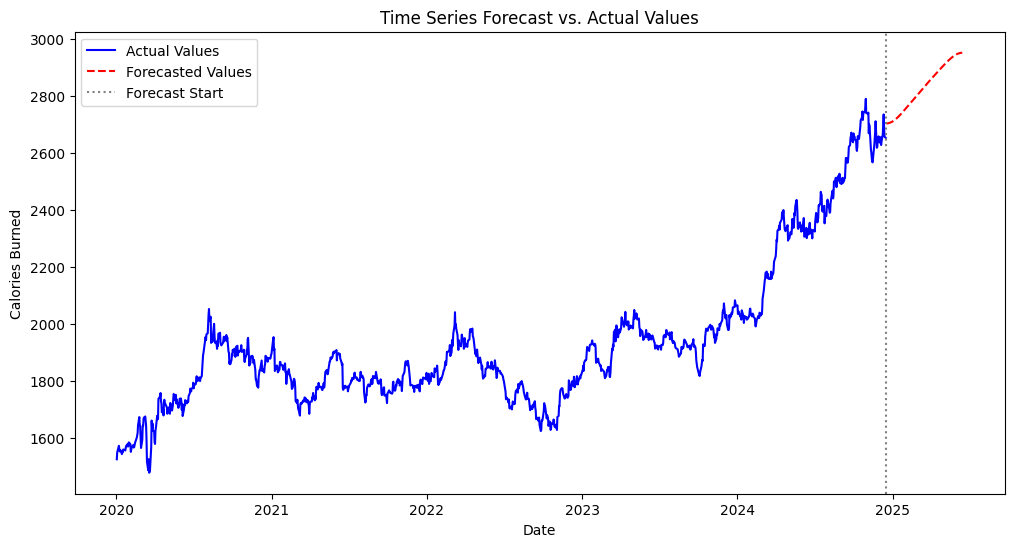

In [18]:
import matplotlib.pyplot as plt

# Convert the forecast index to datetime format
prediction_autots.index = pd.to_datetime(prediction_autots.index)

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(autots_data['date'], autots_data['value'], label='Actual Values', color='blue')

# Plot forecasted values
plt.plot(prediction_autots.index, prediction_autots.values, label='Forecasted Values', color='red', linestyle='dashed')

# Highlight the forecast section
plt.axvline(x=prediction_autots.index[0], color='gray', linestyle='dotted', label='Forecast Start')

# Add labels and title
plt.title('Time Series Forecast vs. Actual Values')
plt.xlabel('Date')
plt.ylabel('Calories Burned')
plt.legend()

# Show the plot
plt.show()

In [19]:
# compare the results of the two models
print("Prophet Metrics: ", prophet_metrics)
print("AutoTS Metrics: ", autots_metrics)

Prophet Metrics:  {'R²': 0.9730132804866544, 'MAE': np.float64(33.55811913223206), 'MSE': np.float64(1830.324804130844), 'RMSE': np.float64(42.78229545186705)}
AutoTS Metrics:  {'R²': -4.726916515654531, 'MAE': np.float64(342.2540691066254), 'MSE': np.float64(123233.79991268927), 'RMSE': np.float64(351.04672041295197)}
